In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Python/practice5005/highlevelcondo.csv')
df.describe()

,ID,Longitude,Latitude,Transaction_Cycle(day),Followers,Price_PerSquare,Area,BedRoom,SittingRoom,Kitchen,...,Building_Year,Renovation,Building_structure,Elevator_Ratio,Elevator,Subway_or_not,District,Average_Price,Total_Price,label
count,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,...,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,2.760500e+04,27605.000000
mean,147633.416156,116.402039,39.943451,40.726354,22.948198,61094.226481,142.426666,2.862090,1.672016,1.010650,...,2003.751675,2.340301,2.877522,0.490299,0.121790,0.676725,9.164789,77230.353487,8.414504e+06,1.157761
std,85173.810165,0.085804,0.066768,53.089595,36.063796,18912.780265,44.580303,0.715155,0.506530,0.120207,...,5.229360,0.865277,0.370289,0.229266,0.327048,0.467735,1.945063,21783.666962,3.210685e+06,1.651054
min,1292.000000,116.068824,39.625055,1.000000,0.000000,16229.000000,90.010000,2.000000,0.000000,0.000000,...,1950.000000,0.000000,1.000000,0.022000,0.000000,0.000000,0.000000,28916.000000,5.588041e+06,0.000000
25%,62739.000000,116.337313,39.894566,10.000000,2.000000,47796.000000,110.310000,2.000000,1.000000,1.000000,...,2000.000000,2.000000,3.000000,0.333000,0.000000,0.000000,9.000000,61273.000000,6.300090e+06,0.000000
50%,148388.000000,116.410760,39.938223,28.000000,10.000000,58591.000000,134.200000,3.000000,2.000000,1.000000,...,2004.000000,3.000000,3.000000,0.500000,0.000000,1.000000,9.000000,75142.000000,7.400048e+06,0.000000
75%,219263.000000,116.463484,39.992675,44.000000,29.000000,70527.000000,160.420000,3.000000,2.000000,1.000000,...,2007.000000,3.000000,3.000000,0.500000,0.000000,1.000000,10.000000,90609.000000,9.330060e+06,3.000000
max,318683.000000,116.698716,40.226876,1271.000000,633.000000,156250.000000,922.700000,8.000000,5.000000,3.000000,...,2016.000000,3.000000,4.000000,3.000000,1.000000,1.000000,12.000000,183109.000000,4.900014e+07,5.000000


In [3]:
df.groupby('label').mean()

,ID,Longitude,Latitude,Transaction_Cycle(day),Followers,Price_PerSquare,Area,BedRoom,SittingRoom,Kitchen,...,Building_Type,Building_Year,Renovation,Building_structure,Elevator_Ratio,Elevator,Subway_or_not,District,Average_Price,Total_Price
label,,,,,,,,,,,,,,,,,,,,,
0,150094.010253,116.405267,39.943032,36.544034,22.021449,53773.334423,131.608366,2.748157,1.633431,1.007316,...,2.069667,2003.573353,2.296569,2.862994,0.458999,0.137006,0.653772,8.858117,71317.400987,6.727898e+06
3,144125.410599,116.396024,39.943792,46.094006,24.879243,72035.492744,152.660987,2.985363,1.712177,1.009464,...,2.145615,2003.810347,2.418423,2.900694,0.522310,0.097666,0.717981,9.707003,85911.738423,1.032668e+07
5,137495.630422,116.395594,39.946410,60.838119,23.814294,88816.474649,212.119768,3.521075,1.902871,1.053146,...,2.403177,2005.433109,2.444105,2.925473,0.680321,0.070861,0.729994,9.919976,100374.780086,1.774707e+07


In [4]:
df_geo = pd.read_csv('C:/Python/practice5005/highlevelcondo.csv',usecols=['ID','Longitude','Latitude','label'])

In [5]:
df_geo.groupby('label').mean()

,ID,Longitude,Latitude
label,,,
0,150094.010253,116.405267,39.943032
3,144125.410599,116.396024,39.943792
5,137495.630422,116.395594,39.946410


In [6]:
df_geo.shape

(27605, 4)

In [7]:
df_cluster = df_geo[['Longitude','Latitude']]
df_cluster = df_cluster.values.astype('float32',copy=False)
df_cluster

array([[116.53081 ,  39.965336],
       [116.69171 ,  39.917923],
       [116.56335 ,  39.90449 ],
       ...,
       [116.47521 ,  40.004807],
       [116.33702 ,  39.911476],
       [116.2769  ,  39.937008]], dtype=float32)

In [8]:
#normaliza data
from sklearn.preprocessing import StandardScaler
model_scaler = StandardScaler().fit(df_cluster)
df_cluster_scaler = model_scaler.transform(df_cluster)
df_cluster_scaler

array([[ 1.5007417 ,  0.32778123],
       [ 3.376016  , -0.38234445],
       [ 1.8799757 , -0.58351535],
       ...,
       [ 0.8527985 ,  0.91895264],
       [-0.75776774, -0.47890192],
       [-1.4584391 , -0.09650017]], dtype=float32)

In [9]:
from sklearn.cluster import DBSCAN

In [10]:
# select the optimal parameter

res_1=[]
lit_1=[500,1000,2000,3000]

for Eps in np.arange(0.1,0.95,0.05):
    for Min_samples in lit_1:
        model = DBSCAN(eps=Eps,min_samples=Min_samples).fit(df_cluster_scaler)
        n_clusters = len([i for i in set(model.labels_) if i != -1])
        outliners = np.sum(np.where(model.labels_ == -1))
        res_1.append({'eps':Eps,'min_samples':Min_samples,'n_clusters':n_clusters,'outliners':outliners})
df_res_1 = pd.DataFrame(res_1)
df_res_1    # select n_clusters = 7

,eps,min_samples,n_clusters,outliners
0,0.10,500,3,343269738
1,0.10,1000,0,381004210
2,0.10,2000,0,381004210
3,0.10,3000,0,381004210
4,0.15,500,7,240418518
...,...,...,...,...
63,0.85,3000,1,19526278
64,0.90,500,1,3309258
65,0.90,1000,1,6404145
66,0.90,2000,1,9496754


In [11]:
#df_res_1.to_csv('C:/Python/practice5005/df_res_1.csv')

In [13]:
#build model based on normaliza data
model_3 = DBSCAN(eps=0.2,min_samples=500).fit(df_cluster_scaler)
model_3

DBSCAN(eps=0.2, min_samples=500)

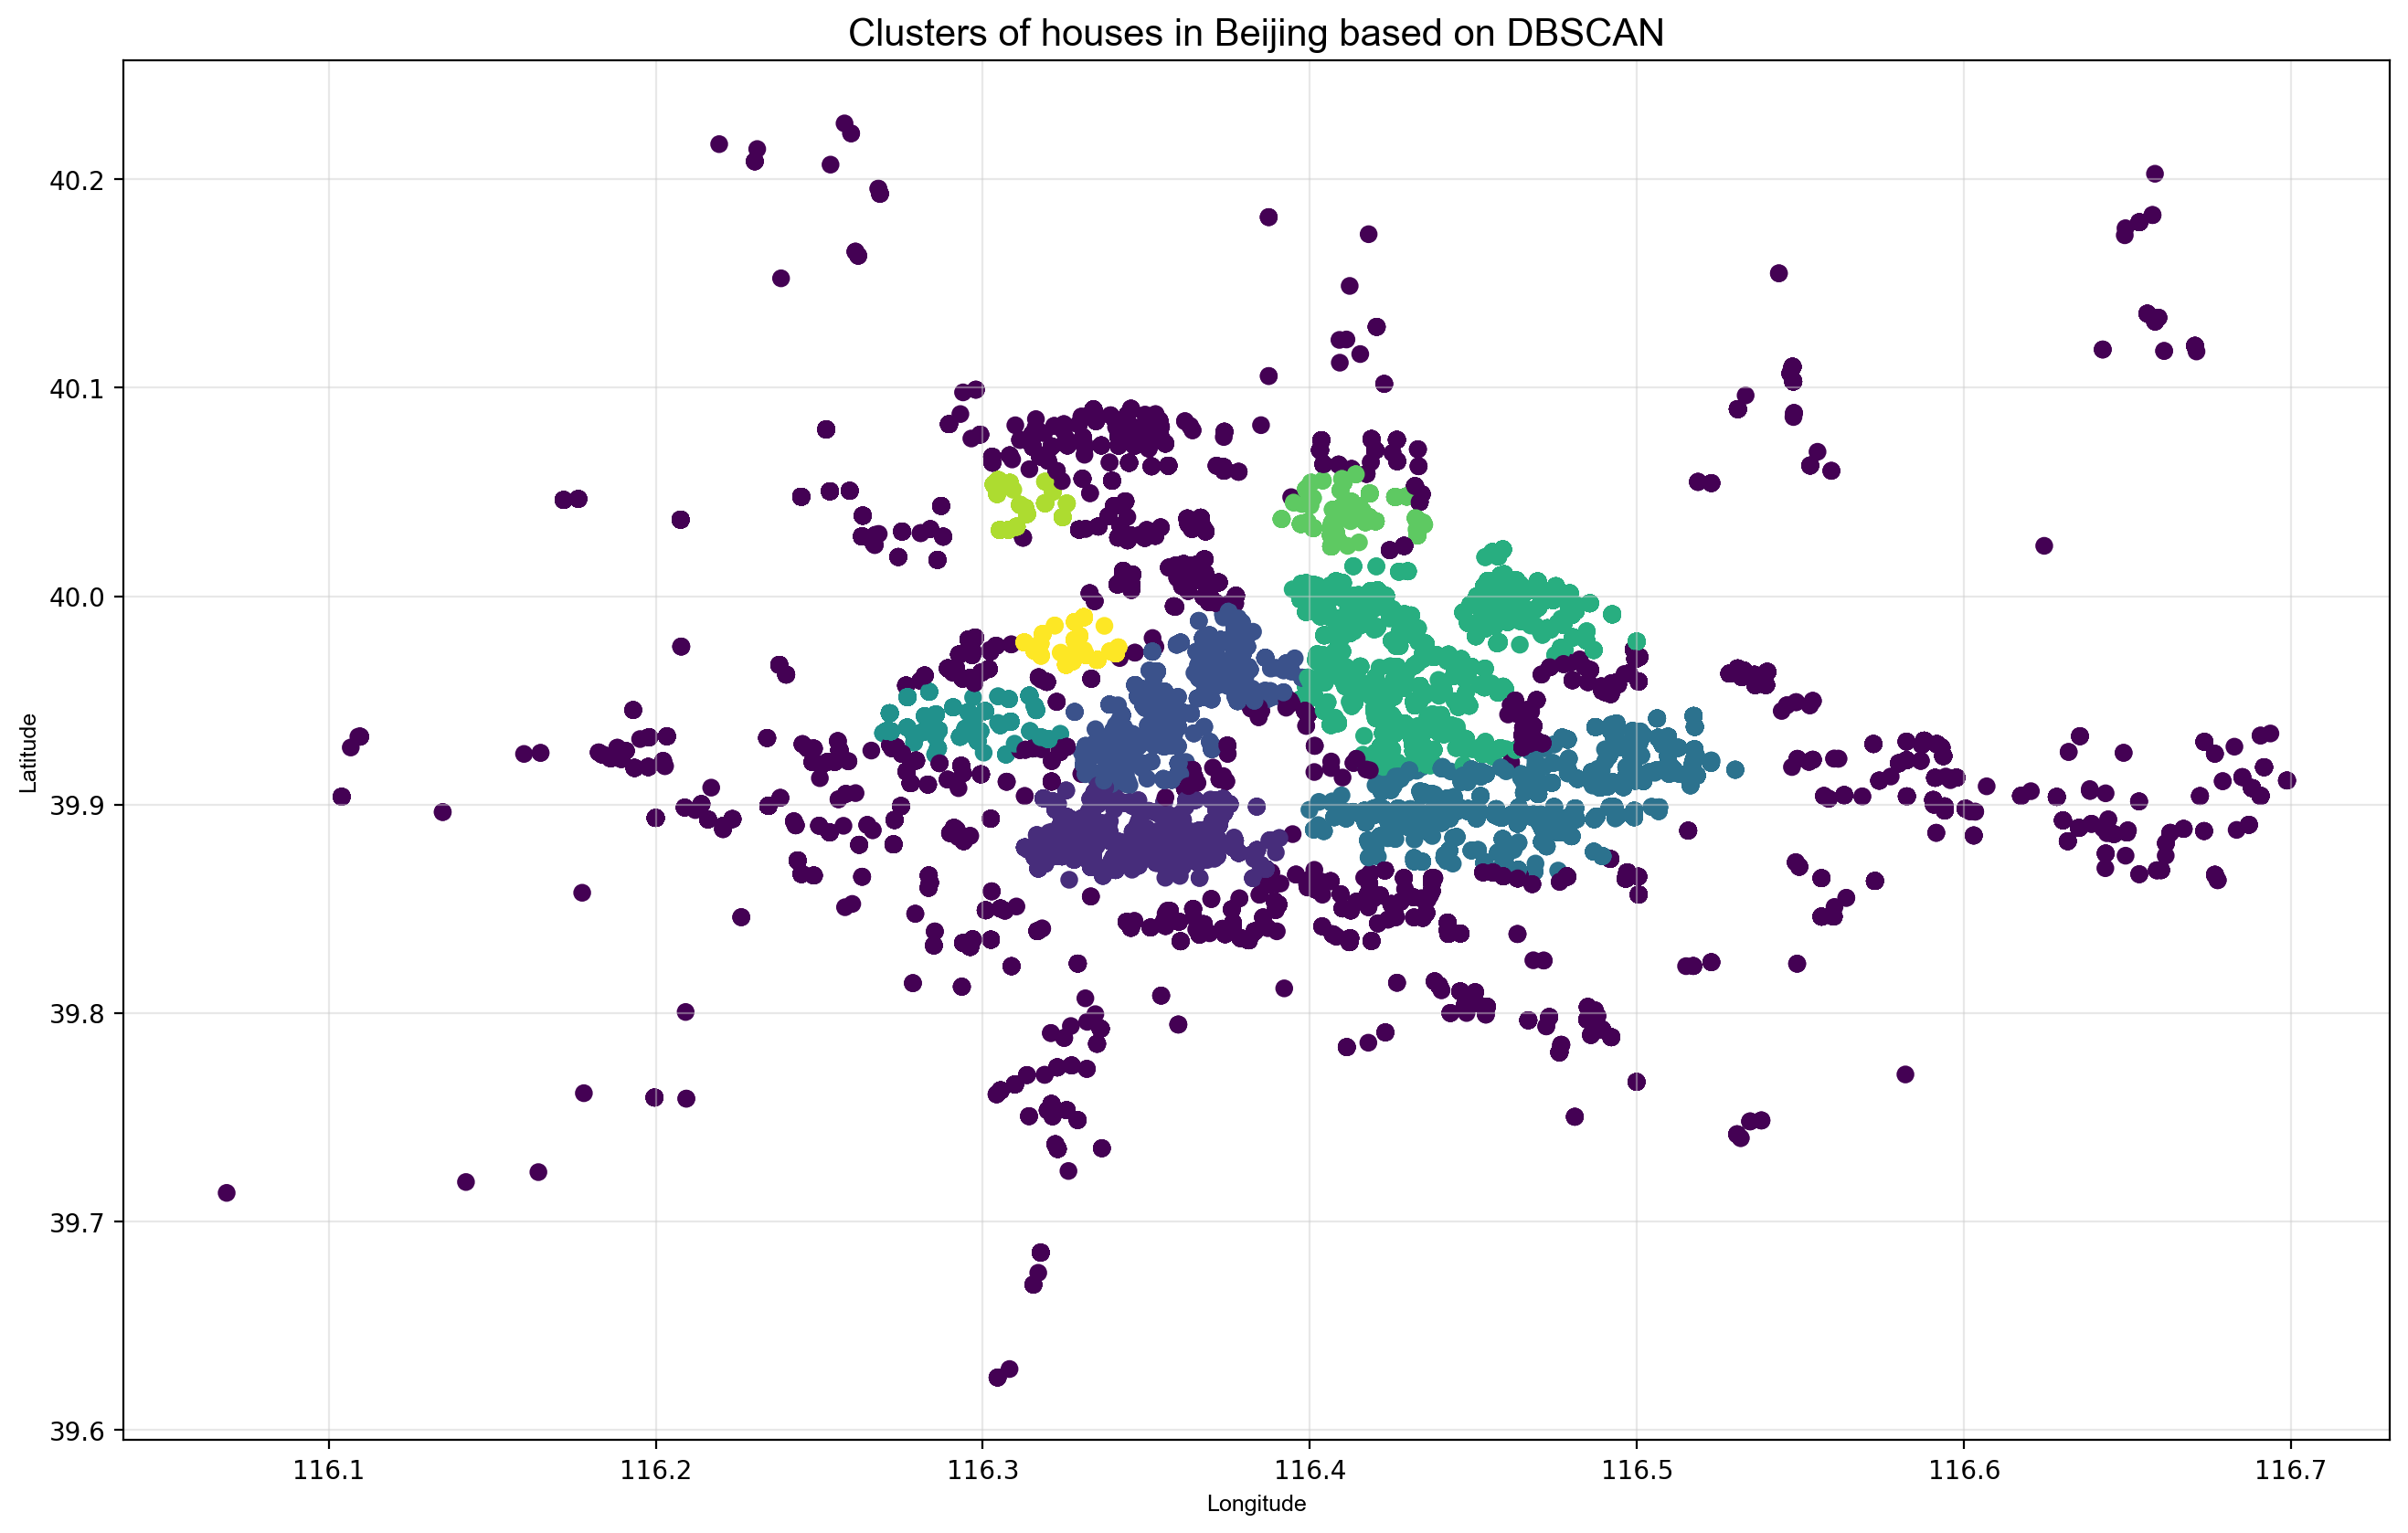

In [14]:
colors3 = model_3.labels_
plt.figure(dpi=200,figsize=(16,10))
plt.scatter(df_geo['Longitude'],df_geo['Latitude'],c=colors3)
plt.xlabel('Longitude',family = 'Arial',fontsize=9)
plt.ylabel('Latitude',family = 'Arial',fontsize=9)
plt.title('Clusters of houses in Beijing based on DBSCAN',family = 'Arial',fontsize=15)
plt.grid(which='major',color='#cccccc',alpha=0.45)
plt.show()

In [15]:
df['label_geo']=model_3.labels_
df.head(3)

,ID,Longitude,Latitude,Transaction_Time,Transaction_Cycle(day),Followers,Price_PerSquare,Area,BedRoom,SittingRoom,...,Building_structure,Elevator_Ratio,Elevator,Duty_Free,Subway_or_not,District,Average_Price,Total_Price,label,label_geo
0,1292,116.530808,39.965335,31/12/21,3,0,51600,271.32,6,3,...,3,0.500,0,NaN,0,9,61635,14000112.00,5,-1
1,1330,116.691712,39.917924,29/12/21,78,64,51594,120.17,3,2,...,2,0.500,1,NaN,0,4,46086,6200050.98,0,-1
2,1341,116.563348,39.904493,28/12/21,121,0,37357,155.26,3,2,...,3,0.333,0,NaN,1,9,46339,5800047.82,0,-1


In [17]:
df.to_csv('C:/Python/practice5005/DBSCAN_Analysis.csv')

In [13]:
#plot in map
#pip install folium
#pip install geopy

In [14]:
from geopy.geocoders import ArcGIS

In [15]:
Beijian = ArcGIS().geocode('beijing')
Beijian

Location(Beijing, (39.90750000000003, 116.39723000000004, 0.0))

In [18]:
import folium
bj_map = folium.Map(location=[39.90750000000003, 116.39723000000004],zoom_start=8)
bj_map

In [17]:
a_list = df[['ID','Longitude','Latitude','label_geo']].values.tolist()
a_list

[[1292.0, 116.53080790000001, 39.96533486, -1.0],
 [1330.0, 116.69171170000001, 39.91792419, -1.0],
 [1341.0, 116.56334790000001, 39.90449301, -1.0],
 [1346.0, 116.3235196, 39.92518591, -1.0],
 [1357.0, 116.41883659999999, 40.0754141, -1.0],
 [1366.0, 116.670593, 40.12014711, -1.0],
 [1369.0, 116.4474355, 39.80402466, -1.0],
 [1370.0, 116.5182653, 39.91393677, 2.0],
 [1381.0, 116.4893287, 39.79202715, -1.0],
 [1389.0, 116.3727261, 39.9790226, 1.0],
 [1402.0, 116.3407606, 39.92232324, 1.0],
 [1404.0, 116.3241868, 39.87515173, 0.0],
 [1419.0, 116.32141999999999, 40.05011324, 6.0],
 [1423.0, 116.4849702, 39.80286118, -1.0],
 [1430.0, 116.33492360000001, 39.78521876, -1.0],
 [1446.0, 116.5727376, 39.86334814, -1.0],
 [1449.0, 116.53263829999999, 39.9643723, -1.0],
 [1452.0, 116.4513716, 39.87822907, 2.0],
 [1456.0, 116.3228881, 39.73476352, -1.0],
 [1458.0, 116.40879129999999, 40.06313451, -1.0],
 [1462.0, 116.3666165, 40.03765655, -1.0],
 [1465.0, 116.2532527, 40.05035473, -1.0],
 [1471.0

In [31]:
from geopy.geocoders import Nominatim


In [29]:
geo_list = df[['Longitude','Latitude']].values.tolist()
geo_list

[[116.53080790000001, 39.96533486],
 [116.69171170000001, 39.91792419],
 [116.56334790000001, 39.90449301],
 [116.3235196, 39.92518591],
 [116.41883659999999, 40.0754141],
 [116.670593, 40.12014711],
 [116.4474355, 39.80402466],
 [116.5182653, 39.91393677],
 [116.4893287, 39.79202715],
 [116.3727261, 39.9790226],
 [116.3407606, 39.92232324],
 [116.3241868, 39.87515173],
 [116.32141999999999, 40.05011324],
 [116.4849702, 39.80286118],
 [116.33492360000001, 39.78521876],
 [116.5727376, 39.86334814],
 [116.53263829999999, 39.9643723],
 [116.4513716, 39.87822907],
 [116.3228881, 39.73476352],
 [116.40879129999999, 40.06313451],
 [116.3666165, 40.03765655],
 [116.2532527, 40.05035473],
 [116.5477717, 40.10302364],
 [116.3177, 39.68501714],
 [116.4995095, 39.9698673],
 [116.36277369999999, 40.00251283],
 [116.6611563, 40.11769018],
 [116.38741499999999, 40.10565257],
 [116.3354308, 39.90233681],
 [116.35542269999999, 39.84409378],
 [116.34073000000001, 39.972556899999994],
 [116.3801393, 39.

In [43]:
g_list = ['39.88303032,116.3471982','39.95159496,116.3614374','39.90446015,116.4721068']
geolocator = Nominatim(user_agent='Baidu')
for g in geo_list:
    location = geolocator.reverse(g)
    print(location.address)

ValueError: Must be a coordinate pair or Point

In [49]:
geolocator = Nominatim(user_agent='Gaode')
location = geolocator.reverse('39.88303032,116.3471982')
print(location)

南线阁街, 牛街街道, 西城区, 北京市, 100032, 中国


In [45]:
geolocator = Nominatim(user_agent='Gaode')
location = geolocator.reverse('39.95159496,116.36143738806')
print(location)

海淀区星火小学, 文慧园路, 北太平庄街道, 海淀区, 北京市, 100082, 中国


In [46]:
geolocator = Nominatim(user_agent='Gaode')
location = geolocator.reverse('39.9044601476633,116.47210684447')
print(location)

八里庄街道, 朝阳区, 北京市, 3208, 中国


In [47]:
geolocator = Nominatim(user_agent='Gaode')
location = geolocator.reverse('39.9403511329407,116.29454902447')
print(location)

海淀区实验小学（北洼路校区）, 长智路, 紫竹院街道, 海淀区, 北京市, 100048, 中国


In [50]:
geolocator = Nominatim(user_agent='Gaode')
location = geolocator.reverse('39.9794947451602,116.43942821093')
print(location)

太阳宫北街, 太阳宫地区, 朝阳区, 北京市, 101102, 中国


In [51]:
geolocator = Nominatim(user_agent='Gaode')
location = geolocator.reverse('40.0394900576384,116.41480924711')
print(location)

6号楼, 春华路, 奥运村街道, 朝阳区, 北京市, 102218, 中国


In [53]:
geolocator = Nominatim(user_agent='Gaode')
location = geolocator.reverse('40.04098462994,116.31036506059')
print(location)

当代城市家园, 东北旺村, 海淀区, 北京市, 100085, 中国


In [54]:
geolocator = Nominatim(user_agent='Gaode')
location = geolocator.reverse('39.9753698394205,116.33149941431')
print(location)

东升镇, 海淀区, 北京市, 100098, 中国
